# Jakub Kuciński

## Zad1
Opakowanie kodu z notatek w funkcje

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
import scipy.stats

%matplotlib inline

In [45]:
def get_next_instance(QAP_INSTANCE_URL, verbose=False):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    if verbose:
        print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Distance matrix:\n', B)
    return n, A, B

In [46]:
def qap_objective_function(p, n, A, B):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [47]:
def random_neighbor(p, n, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [48]:
def simulated_annealing(n, A, B, T=500000, radius=1, alpha=1.0, times=True):
    if times:
        t0 = time.time()
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T, dtype=np.int64)
    for t in range(T):
        q = random_neighbor(p, n, radius)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        
    if times:
        print(time.time() - t0)
    return costs

## a)

b'12\n'
41.9637176990509
578.0


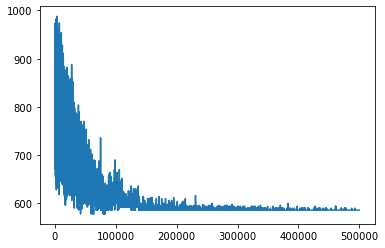

In [55]:
# 578 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'
n12, A12, B12 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n12, A12, B12)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

b' 14\n'
46.38007831573486
1014.0


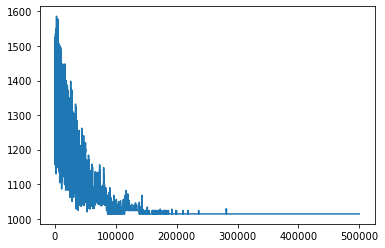

In [56]:
# 1014 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug14.dat'
n14, A14, B14 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n14, A14, B14)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

47.749576568603516
1152.0


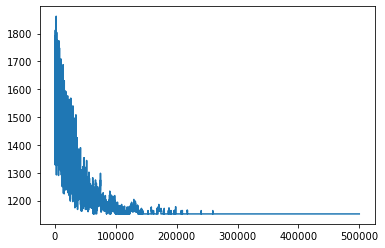

In [59]:
# 1150 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug15.dat'
n15, A15, B15 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n15, A15, B15)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

56.8782377243042
1150.0


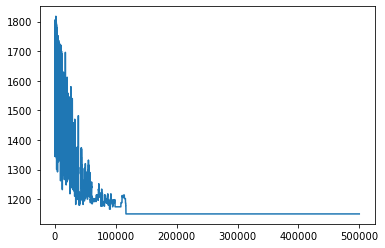

In [64]:
# 1150 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug15.dat'
n15, A15, B15 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n15, A15, B15, T=500000, radius=2, alpha=1.00)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

56.004231452941895
1150.0


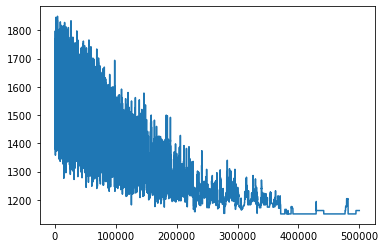

In [62]:
# 1150 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug15.dat'
n15, A15, B15 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n15, A15, B15, T=500000, radius=2, alpha=0.20)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

57.50511074066162
1622.0


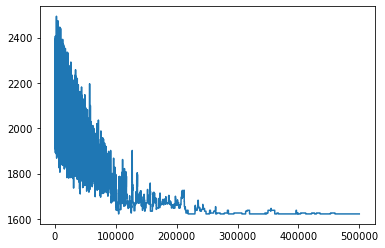

In [66]:
# 1610 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16a.dat'
n16, A16, B16 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n16, A16, B16 , T=500000, radius=2, alpha=0.40)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

68.37006783485413
1626.0


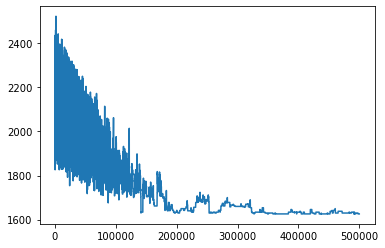

In [67]:
# 1610 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16a.dat'
n16, A16, B16 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n16, A16, B16 , T=500000, radius=3, alpha=0.30)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

94.42849016189575
1610.0


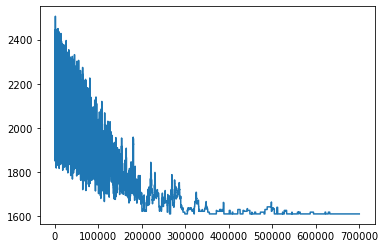

In [68]:
# 1610 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16a.dat'
n16, A16, B16 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n16, A16, B16 , T=700000, radius=3, alpha=0.30)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

59.12985849380493
1244.0


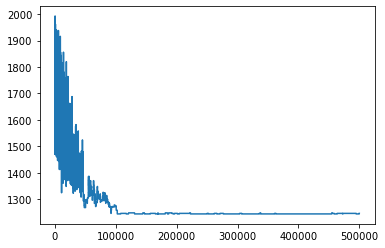

In [70]:
# 1240 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16b.dat'
n16, A16, B16 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n16, A16, B16 , T=500000, radius=2, alpha=1.00)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

58.90338683128357
1240.0


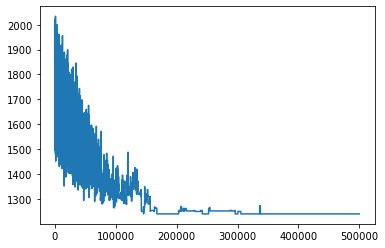

In [71]:
# 1240 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug16b.dat'
n16, A16, B16 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n16, A16, B16 , T=500000, radius=2, alpha=0.50)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

65.7088782787323
1734.0


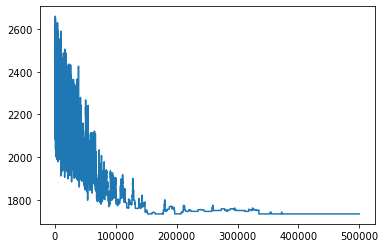

In [72]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=500000, radius=2, alpha=0.50)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

60.80164337158203
1738.0


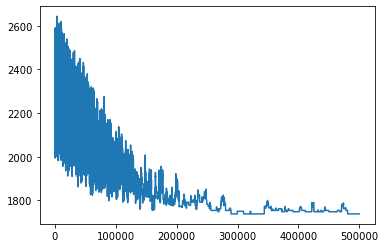

In [73]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=500000, radius=2, alpha=0.30)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

67.25650334358215
1734.0


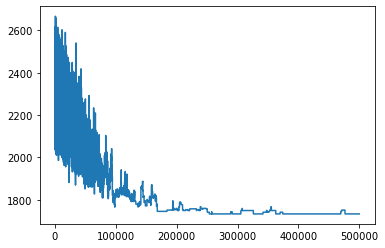

In [74]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=500000, radius=3, alpha=0.40)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

67.97990846633911
1742.0


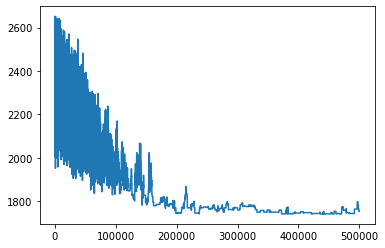

In [75]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=500000, radius=3, alpha=0.30)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

96.89916253089905
1742.0


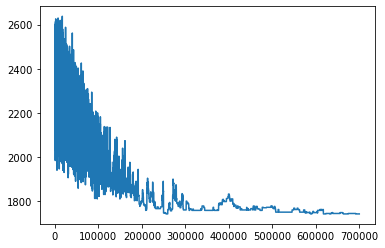

In [76]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=700000, radius=3, alpha=0.35)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

94.97325301170349
1750.0


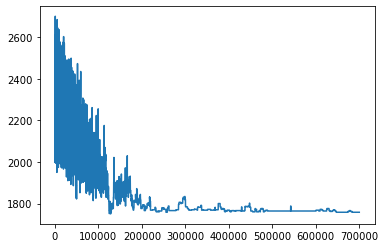

In [77]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=700000, radius=3, alpha=0.40)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

94.25416612625122
1734.0


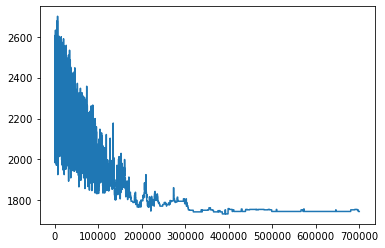

In [78]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=700000, radius=3, alpha=0.37)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

92.48991632461548
1742.0


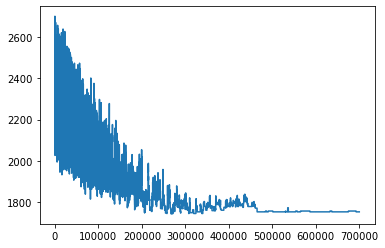

In [79]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=700000, radius=2, alpha=0.30)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

103.21134853363037
1732.0


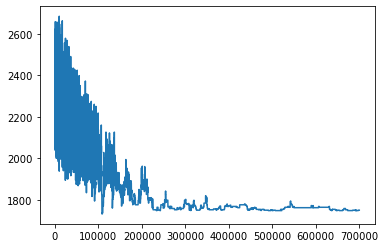

In [80]:
# 1732 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing(n17, A17, B17, T=700000, radius=3, alpha=0.36)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

## b)

64.95835971832275
65.3501615524292
64.00201654434204
64.4377498626709
66.26840782165527
63.75305438041687
63.230984926223755
63.37312173843384
63.64708733558655
63.12308621406555
63.11792016029358
63.034223318099976
63.284865617752075
63.667301177978516
62.68696451187134
65.60013175010681
67.06833624839783
65.07275247573853
68.4087290763855
68.21780109405518


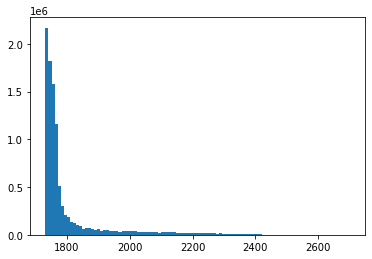

1804.3030474 123.51661865948765


In [107]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n_hist, A_hist, B_hist = get_next_instance(QAP_INSTANCE_URL)
T_hist = 500000
radius_hist = 2
alpha_hist = 0.5
number_of_iterations = 20
costs = np.empty((number_of_iterations*T_hist), dtype=np.int64)
for i in range(number_of_iterations):
    costs[i*T_hist : i*T_hist+T_hist] = simulated_annealing(n_hist, A_hist, B_hist, T=T_hist, radius=radius_hist, alpha=alpha_hist)

plt.figure()
plt.hist(costs, bins=100)
plt.show()
print(costs.mean(), costs.std())

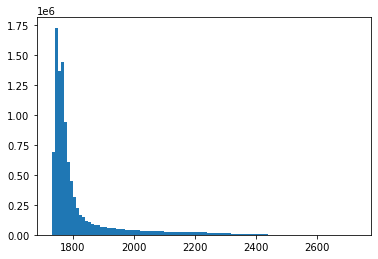

1815.746396 121.43788111216034


In [70]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n_hist, A_hist, B_hist = get_next_instance(QAP_INSTANCE_URL)
T_hist = 50000
radius_hist = 2
alpha_hist = 0.5
number_of_iterations = 200
costs = np.empty((number_of_iterations*T_hist), dtype=np.int64)
for i in range(number_of_iterations):
    costs[i*T_hist : i*T_hist+T_hist] = simulated_annealing(n_hist, A_hist, B_hist, T=T_hist, radius=radius_hist, alpha=alpha_hist, times=False)

plt.figure()
plt.hist(costs, bins=100)
plt.show()
print(costs.mean(), costs.std())

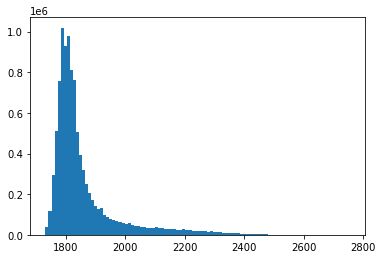

1856.3706324 114.53738388327224


In [71]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n_hist, A_hist, B_hist = get_next_instance(QAP_INSTANCE_URL)
T_hist = 5000
radius_hist = 2
alpha_hist = 0.5
number_of_iterations = 2000
costs = np.empty((number_of_iterations*T_hist), dtype=np.int64)
for i in range(number_of_iterations):
    costs[i*T_hist : i*T_hist+T_hist] = simulated_annealing(n_hist, A_hist, B_hist, T=T_hist, radius=radius_hist, alpha=alpha_hist, times=False)

plt.figure()
plt.hist(costs, bins=100)
plt.show()
print(costs.mean(), costs.std())

## c)

In [49]:
def sa_success_and_accepted_failures(n, A, B, T=500000, radius=1, alpha=1.0, times=True):
    if times:
        t0 = time.time()
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    acc = np.zeros(T, dtype=np.int64)
    for t in range(T):
        q = random_neighbor(p, n, radius)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
            acc[t] = 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            acc[t] = 1
    if times:
        print(time.time() - t0)
    return np.cumsum(acc)

53.186219930648804
52.13337707519531
58.45068025588989
65.31914806365967
65.64550304412842


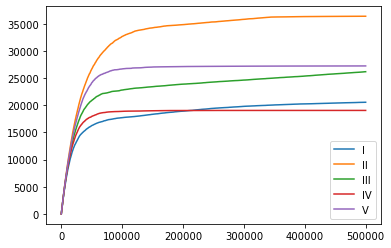

In [13]:
plt.figure()

QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
acc = sa_success_and_accepted_failures(n, A, B, T=500000, radius=1, alpha=1.0)
plt.plot(acc, label='I')

QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
acc = sa_success_and_accepted_failures(n, A, B, T=500000, radius=1, alpha=0.5)
plt.plot(acc, label='II')

QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
acc = sa_success_and_accepted_failures(n, A, B, T=500000, radius=2, alpha=0.5)
plt.plot(acc, label='III')

QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
acc = sa_success_and_accepted_failures(n, A, B, T=500000, radius=3, alpha=0.5)
plt.plot(acc, label='IV')

QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
acc = sa_success_and_accepted_failures(n, A, B, T=500000, radius=3, alpha=0.35)
plt.plot(acc, label='V')
plt.legend()
plt.show()

## d)

In [50]:
def perm_dist(p, q):
    τ, p_value = scipy.stats.kendalltau(p, q)
    return τ

In [51]:
def sa_perm_dist_and_obj_fun_dependency(n, A, B, T=500000, radius=1, alpha=1.0, times=True):
    if times:
        t0 = time.time()
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    dist = np.zeros(T, dtype=np.float64)
    difference = np.zeros(T, dtype=np.int64)
    number_of_successes = 0
    for t in range(T):
        q = random_neighbor(p, n, radius)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            difference[number_of_successes] = p_cost - q_cost
            dist[number_of_successes] = perm_dist(p, q)
            p, p_cost = q, q_cost
            number_of_successes += 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost

    if times:
        print(time.time() - t0)
    return dist[:number_of_successes], difference[:number_of_successes]

71.42612361907959


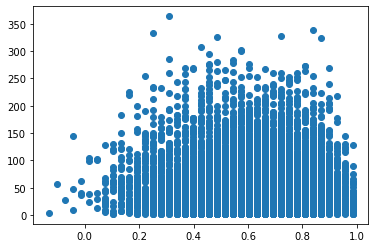

In [25]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
dist, difference = sa_perm_dist_and_obj_fun_dependency(n, A, B, T=500000, radius=3, alpha=0.5)
plt.figure()
plt.scatter(dist, difference)
plt.show()

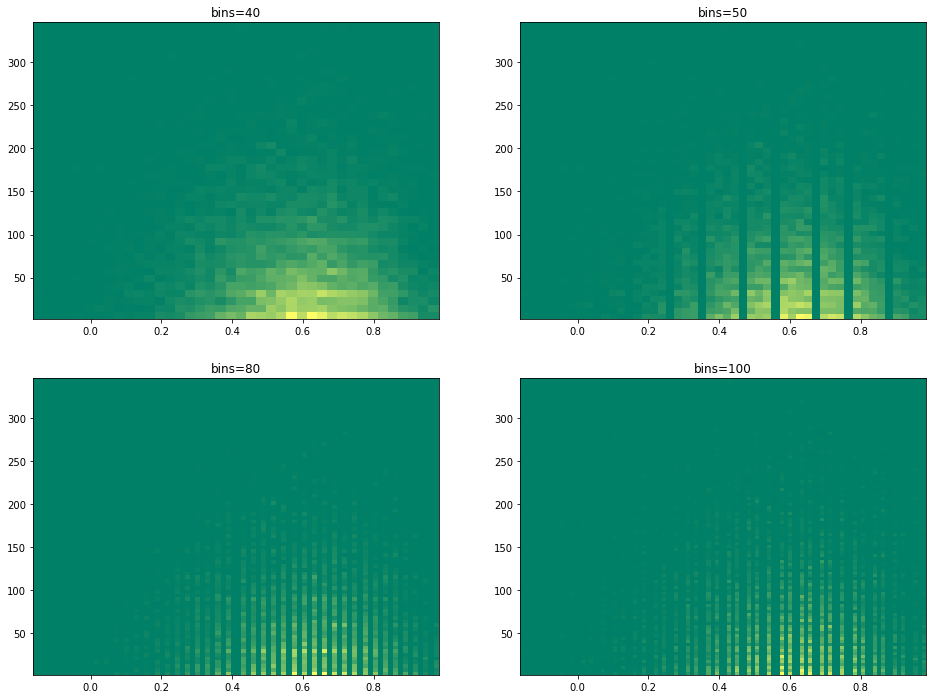

In [65]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.gca().set_title('bins=40')
plt.hist2d(dist, difference, bins=40, cmap ="summer")
plt.subplot(2, 2, 2)
plt.gca().set_title('bins=50')
plt.hist2d(dist, difference, bins=50, cmap ="summer")
plt.subplot(2, 2, 3)
plt.gca().set_title('bins=80')
plt.hist2d(dist, difference, bins=80, cmap ="summer")
plt.subplot(2, 2, 4)
plt.gca().set_title('bins=100')
plt.hist2d(dist, difference, bins=100, cmap ="summer")
plt.show()

79.0549418926239


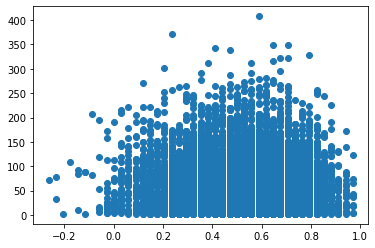

In [66]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
dist, difference = sa_perm_dist_and_obj_fun_dependency(n, A, B, T=500000, radius=4, alpha=0.5)
plt.figure()
plt.scatter(dist, difference)
plt.show()

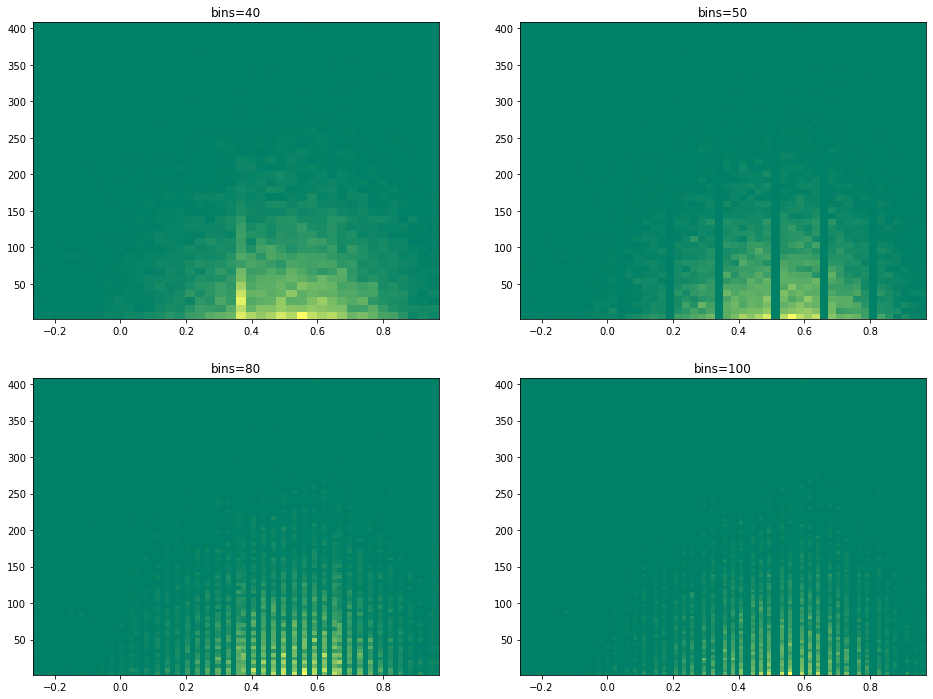

In [67]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.gca().set_title('bins=40')
plt.hist2d(dist, difference, bins=40, cmap ="summer")
plt.subplot(2, 2, 2)
plt.gca().set_title('bins=50')
plt.hist2d(dist, difference, bins=50, cmap ="summer")
plt.subplot(2, 2, 3)
plt.gca().set_title('bins=80')
plt.hist2d(dist, difference, bins=80, cmap ="summer")
plt.subplot(2, 2, 4)
plt.gca().set_title('bins=100')
plt.hist2d(dist, difference, bins=100, cmap ="summer")
plt.show()

65.55006885528564


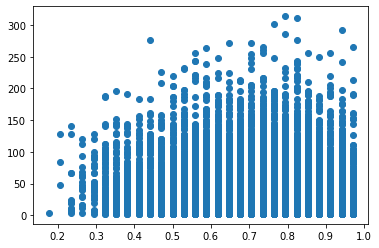

In [68]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n, A, B = get_next_instance(QAP_INSTANCE_URL)
dist, difference = sa_perm_dist_and_obj_fun_dependency(n, A, B, T=500000, radius=2, alpha=0.5)
plt.figure()
plt.scatter(dist, difference)
plt.show()

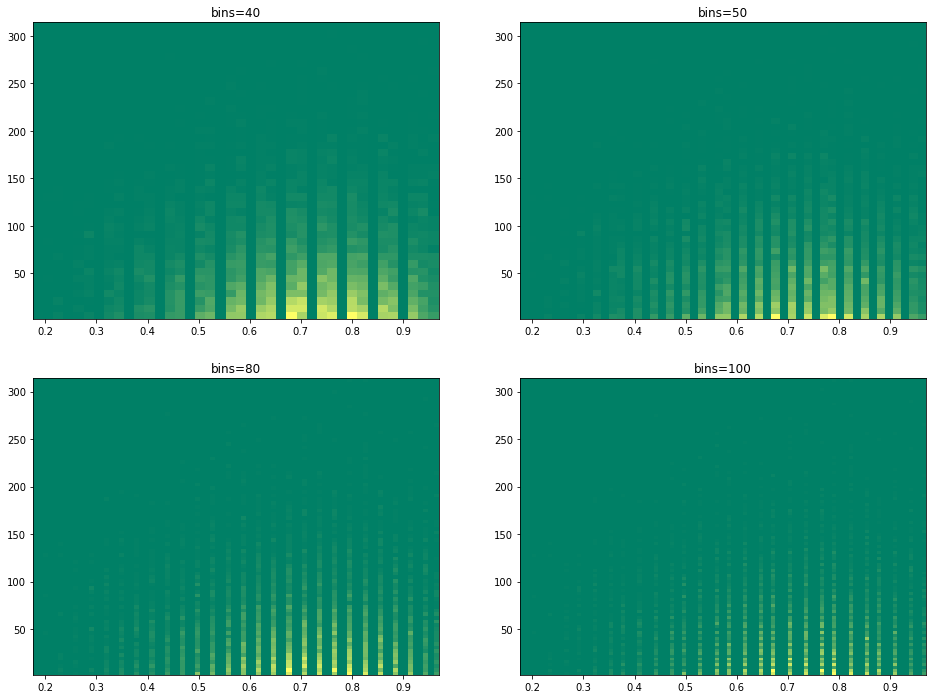

In [69]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.gca().set_title('bins=40')
plt.hist2d(dist, difference, bins=40, cmap ="summer")
plt.subplot(2, 2, 2)
plt.gca().set_title('bins=50')
plt.hist2d(dist, difference, bins=50, cmap ="summer")
plt.subplot(2, 2, 3)
plt.gca().set_title('bins=80')
plt.hist2d(dist, difference, bins=80, cmap ="summer")
plt.subplot(2, 2, 4)
plt.gca().set_title('bins=100')
plt.hist2d(dist, difference, bins=100, cmap ="summer")
plt.show()

## e)

In [26]:
def simulated_annealing_different_failure_acceptance(n, A, B, T=500000, radius=1, alpha=1.0, beta=1.0, times=True):
    if times:
        t0 = time.time()
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T, dtype=np.int64)
    for t in range(T):
        q = random_neighbor(p, n, radius)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.pi / 2 - np.arctan(alpha * np.power(q_cost - p_cost, beta) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        
    if times:
        print(time.time() - t0)
    return costs

0.9447653293609619
578


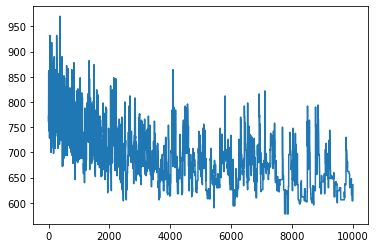

In [121]:
# 578 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'
n12, A12, B12 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n12, A12, B12, T=10000)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

46.40075898170471
1014


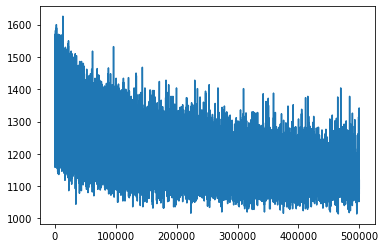

In [124]:
# 1014 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug14.dat'
n14, A14, B14 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n14, A14, B14, alpha=10.0)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

52.554673194885254
1150


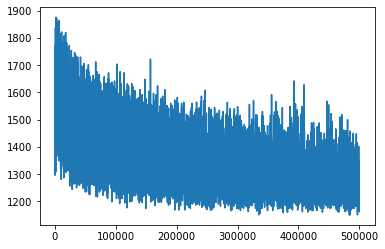

In [126]:
# 1150 Ok
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug15.dat'
n15, A15, B15 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n15, A15, B15, alpha=100.0)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

53.42742133140564
1746


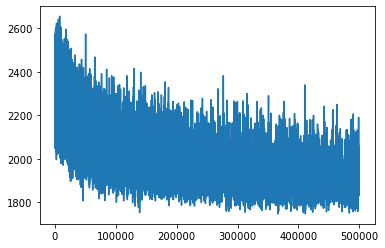

In [128]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n17, A17, B17, alpha=1000.0)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

53.93210482597351
1734


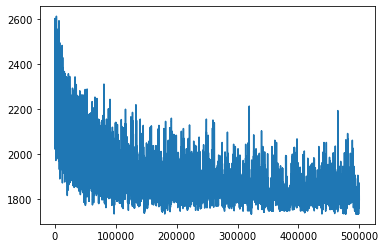

In [137]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n17, A17, B17, beta=1.3)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

63.57367253303528
1746


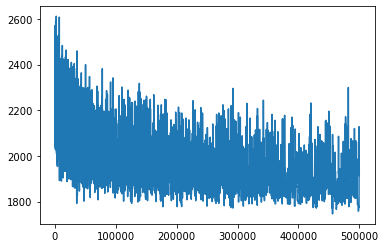

In [138]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n17, A17, B17, radius=2, beta=1.3)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

62.45888590812683
1738


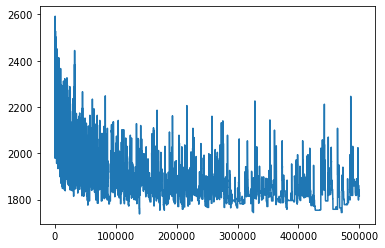

In [139]:
# 1732 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n17, A17, B17, radius=2, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

54.76053738594055
1732


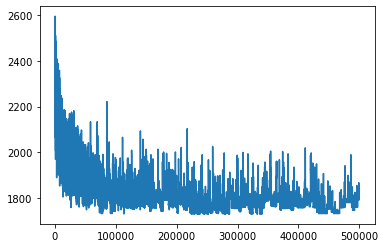

In [140]:
# 1732 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug17.dat'
n17, A17, B17 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n17, A17, B17, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

57.46513509750366
1930


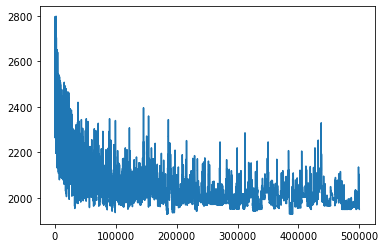

In [27]:
# 1930 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug18.dat'
n18, A18, B18 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n18, A18, B18, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

62.02103090286255
2570


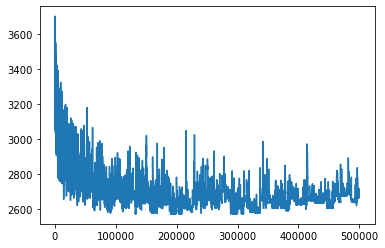

In [28]:
# 2570 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug20.dat'
n20, A20, B20 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n20, A20, B20, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

72.10409426689148
2438


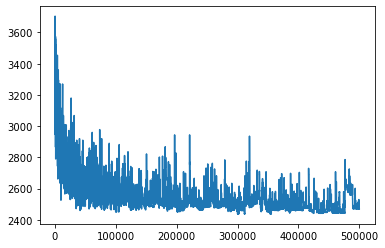

In [29]:
# 2438 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug21.dat'
n21, A21, B21 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n21, A21, B21, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

66.1557834148407
3596


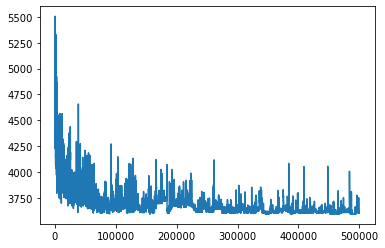

In [30]:
# 3596 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug22.dat'
n22, A22, B22 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n22, A22, B22, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

70.23330807685852
3506


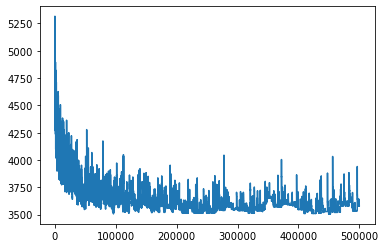

In [31]:
# 3488 NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug24.dat'
n24, A24, B24 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n24, A24, B24, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

98.4857804775238
3488


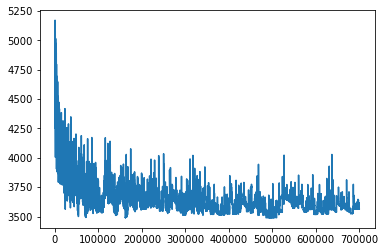

In [32]:
# 3488 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug24.dat'
n24, A24, B24 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n24, A24, B24, T=700000, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

71.70248794555664
3488


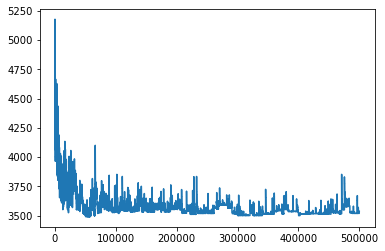

In [43]:
# 3488 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug24.dat'
n24, A24, B24 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n24, A24, B24, radius=1, beta=1.8)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

74.15720629692078
3744


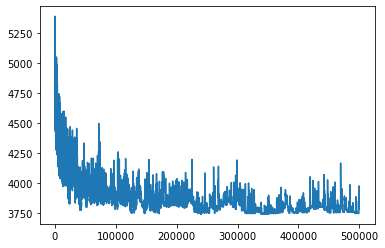

In [33]:
# 3744 OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug25.dat'
n25, A25, B25 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n25, A25, B25, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

77.2500069141388
5234


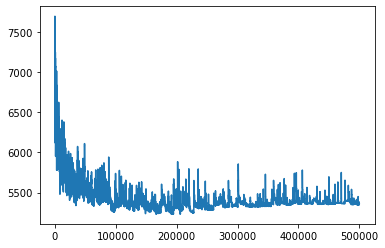

In [34]:
# 5234* OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug27.dat'
n27, A27, B27 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n27, A27, B27, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

81.39340710639954
5194


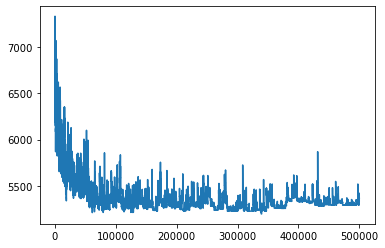

In [35]:
# 5166* NIE
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug28.dat'
n28, A28, B28 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n28, A28, B28, radius=1, beta=1.6)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()

80.62175011634827
5166


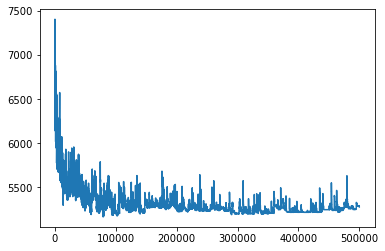

In [40]:
# 5166* OK
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug28.dat'
n28, A28, B28 = get_next_instance(QAP_INSTANCE_URL)
costs = simulated_annealing_different_failure_acceptance(n28, A28, B28, radius=1, beta=1.7)
print(costs.min())
plt.figure()
plt.plot(costs)
plt.show()